## Name : Pranay Rokade
## Batch : A3-49
## Subject : TA2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)

4.11.0


In [3]:
# Load images for feature matching
img1 = cv2.imread('UNO.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('UNO1.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image 2')

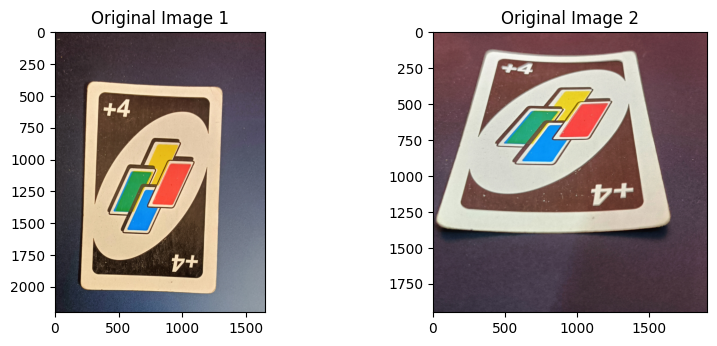

In [4]:
# Display Original Images
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img1)
plt.title('Original Image 1')

plt.subplot(2, 3, 2)
plt.imshow(img2)
plt.title('Original Image 2')

In [29]:
# 1. SIFT Feature Detection and Matching
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.65 * n.distance:
        good_matches.append(m)

img_sift = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

Text(0.5, 1.0, 'SIFT Feature Matching')

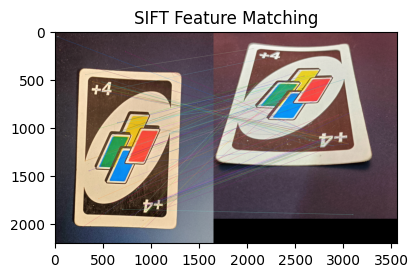

In [30]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(img_sift, cmap='gray')
plt.title('SIFT Feature Matching')

In [21]:
# 2. Harris Corner Detector
img_gray = cv2.imread('grid.png', cv2.IMREAD_GRAYSCALE)
img_harris = img_gray.copy()

dst = cv2.cornerHarris(np.float32(img_gray), 2, 3, 0.04)
dst = cv2.dilate(dst, None)
img_harris[dst > 0.01 * dst.max()] = 255

Text(0.5, 1.0, 'Harris Corner Detection')

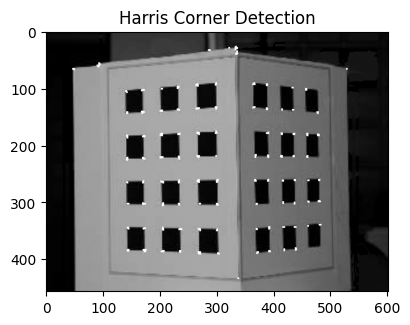

In [22]:
# Display Results
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 3)
plt.imshow(img_harris, cmap='gray')
plt.title('Harris Corner Detection')

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('grid.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)  # Convert to integer

# Draw the corners
for corner in corners:
    x, y = corner.ravel()  # Flatten array
    cv2.circle(img, (x, y), radius=5, color=(0, 255, 0), thickness=-1)

# Convert BGR to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

C:\Users\Pranay Rokade\AppData\Local\Temp\ipykernel_19592\1415820688.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)  # Convert to integer


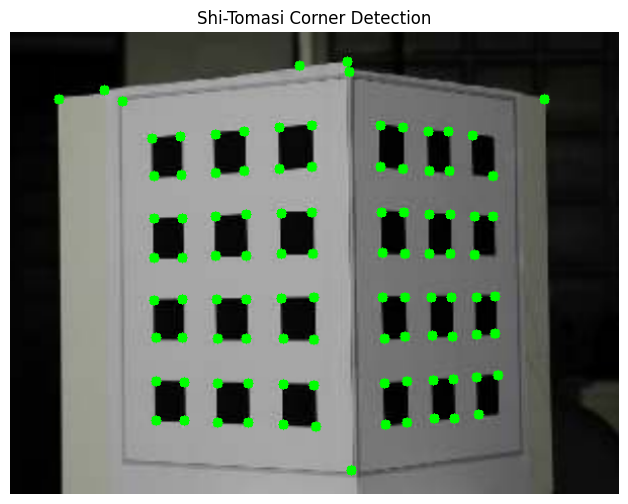

In [24]:
# Display the image with Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")  # Hide axes
plt.show()

## Conclusion

During my experiment with the test image, I changed certain parameter values and observed the following effects:

### 1. SIFT Feature Matching
- **Initial Ratio Threshold:** 0.75  
- **Changed to:** 0.80  
- **Observation:** Increasing the ratio threshold resulted in more matches, but also introduced more false matches, reducing accuracy. Lowering it to 0.70 reduced false matches but also missed some valid key points.

### 2. Harris Corner Detection
- **Initial Sensitivity Factor (k):** 0.04  
- **Changed to:** 0.05  
- **Observation:** Increasing the sensitivity factor detected fewer corners, missing some edges. When reduced to 0.03, more corners were detected, but there was noise and false detections.

- **Initial Block Size:** 3  
- **Changed to:** 4  
- **Observation:** A larger block size resulted in more robust corner detection but missed finer details. Reducing it to 2 detected more corners but introduced noise.

### 3. Shi-Tomasi Corner Detection
- **Initial Quality Level:** 0.01  
- **Changed to:** 0.015  
- **Observation:** Increasing the quality level reduced the number of detected corners, keeping only the strongest ones. Lowering it to 0.005 detected more corners, but some were false detections.

- **Initial Minimum Distance:** 10  
- **Changed to:** 8  
- **Observation:** Reducing the minimum distance resulted in more clustered corner detections, leading to redundancy. Increasing it to 12 spaced out the detected corners but missed some important key points.

### Final Insight
I observed that adjusting these parameters significantly impacted the accuracy of feature detection and corner detection. Fine-tuning these values is necessary for optimal results, depending on the application.